### **`Phân tích dữ liệu Hiertext`**

In [ ]:
import json
from tabulate import tabulate

# Đường dẫn tới các file JSONL
jsonl_files = {
    "train": "/content/drive/MyDrive/dataanalysis/hiertext/gt/train.jsonl",
    "validation": "/content/drive/MyDrive/dataanalysis/hiertext/gt/validation.jsonl",
    "test": "/content/drive/MyDrive/dataanalysis/hiertext/gt/test.jsonl"
}

# Khởi tạo biến đếm tổng
total_images = 0
total_words = 0
has_word_level = False
has_line_level = False
has_paragraph_level = False

# Hàm xử lý một file JSON
def process_json_file(json_path):
    num_images = 0
    file_words = 0
    file_has_word = False
    file_has_line = False
    file_has_paragraph = False

    try:
        # Read the entire file content as a single string
        with open(json_path, "r", encoding="utf-8") as f:
            file_content = f.read()

        # Parse the entire content as a single JSON object
        data = json.loads(file_content)

        if 'annotations' in data:
            annotations = data['annotations']
            num_images = len(annotations) # Each annotation object corresponds to an image

            for ann in annotations:
                # Check annotation levels present and count words
                if 'paragraphs' in ann:
                    file_has_paragraph = True
                    for paragraph in ann['paragraphs']:
                        if 'lines' in paragraph:
                            file_has_line = True
                            for line in paragraph['lines']:
                                if 'words' in line:
                                    file_has_word = True
                                    file_words += len(line['words'])

    except json.JSONDecodeError as e:
        print(f"Error decoding JSON in file {json_path}: {e}")
    except Exception as e:
        print(f"An unexpected error occurred while processing {json_path}: {e}")

    return num_images, file_words, file_has_word, file_has_line, file_has_paragraph

# Xử lý từng file và lưu kết quả
results = []
for file_name, file_path in jsonl_files.items():
    images, words, file_has_word, file_has_line, file_has_paragraph = process_json_file(file_path)

    total_images += images
    total_words += words
    has_word_level = has_word_level or file_has_word
    has_line_level = has_line_level or file_has_line
    has_paragraph_level = has_paragraph_level or file_has_paragraph

    avg_words = words / images if images > 0 else 0
    results.append([
        f"HierText {file_name}",
        images,
        f"{words:,}" if words > 0 else "0",
        f"{avg_words:.1f}" if images > 0 else "0",
        "✓" if file_has_word else "✗",
        "✓" if file_has_line else "✗",
        "✓" if file_has_paragraph else "✗"
    ])

# Thêm dòng tổng
avg_words_total = total_words / total_images if total_images > 0 else 0
results.append([
    "HierText Total",
    total_images,
    f"{total_words:,}" if total_words > 0 else "0",
    f"{avg_words_total:.1f}" if total_images > 0 else "0",
    "✓" if has_word_level else "✗",
    "✓" if has_line_level else "✗",
    "✓" if has_paragraph_level else "✗"
])

# Tạo header cho bảng
headers = ["Dataset", "#Img", "Word-level", "avg/total", "#Word", "Line", "Paragraph"]

# In bảng
print(tabulate(results, headers=headers, tablefmt="grid", stralign="center"))

+---------------------+--------+--------------+-------------+---------+--------+-------------+
|       Dataset       |   #Img |  Word-level  |   avg/total |  #Word  |  Line  |  Paragraph  |
+=====================+========+==============+=============+=========+========+=============+
|   HierText train    |   8281 |  1,014,142   |       122.5 |    ✓    |   ✓    |      ✓      |
+---------------------+--------+--------------+-------------+---------+--------+-------------+
| HierText validation |   1724 |   210,345    |       122   |    ✓    |   ✓    |      ✓      |
+---------------------+--------+--------------+-------------+---------+--------+-------------+
|    HierText test    |   1634 |   194,374    |       119   |    ✓    |   ✓    |      ✓      |
+---------------------+--------+--------------+-------------+---------+--------+-------------+
|   HierText Total    |  11639 |  1,418,861   |       121.9 |    ✓    |   ✓    |      ✓      |
+---------------------+--------+--------------+---

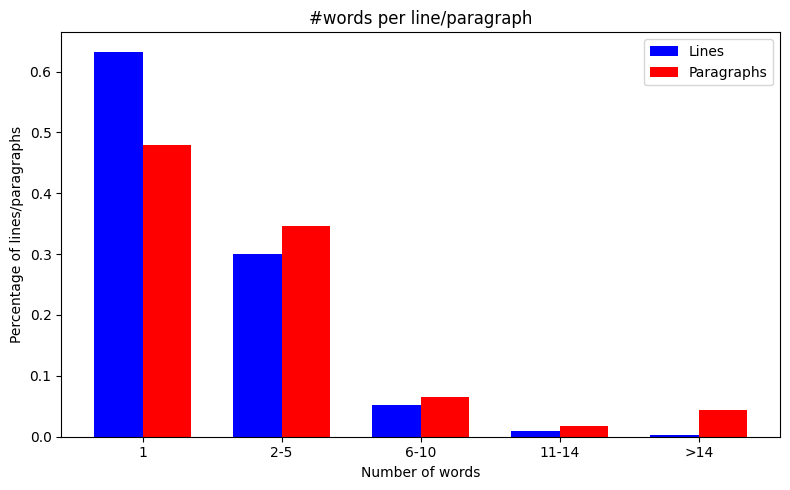

In [ ]:
import json
import matplotlib.pyplot as plt
import os

# Thay đường dẫn đúng nếu bạn dùng trên Colab
jsonl_files = [
    "/content/drive/MyDrive/dataanalysis/hiertext/gt/train.jsonl",
    "/content/drive/MyDrive/dataanalysis/hiertext/gt/validation.jsonl",
    "/content/drive/MyDrive/dataanalysis/hiertext/gt/test.jsonl"
]

# Hàm xử lý dữ liệu từ 1 file JSONL
def process_json_file(json_path):
    word_counts_lines = []
    word_counts_paragraphs = []

    try:
        # Read the entire file content as a single string
        with open(json_path, "r", encoding="utf-8") as f:
            file_content = f.read()

        # Parse the entire content as a single JSON object
        data = json.loads(file_content)

        if 'annotations' in data:
            for ann in data['annotations']:
                if 'paragraphs' in ann:
                    for paragraph in ann['paragraphs']:
                        line_word_counts = []
                        if 'lines' in paragraph:
                            for line_data in paragraph['lines']:
                                if 'words' in line_data:
                                    word_count = len(line_data['words'])
                                    word_counts_lines.append(word_count)
                                    line_word_counts.append(word_count)
                        # Tổng số từ trong đoạn
                        word_counts_paragraphs.append(sum(line_word_counts))
    except FileNotFoundError:
        print(f"⚠️ File not found: {json_path}")
    except json.JSONDecodeError as e:
        print(f"❌ Error decoding JSON in file {json_path}: {e}")
    except Exception as e:
        print(f"❌ An unexpected error occurred while processing {json_path}: {e}")


    return word_counts_lines, word_counts_paragraphs

# Tổng hợp dữ liệu từ các file
all_word_counts_lines = []
all_word_counts_paragraphs = []

for file_path in jsonl_files:
    if os.path.exists(file_path):
        lines, paragraphs = process_json_file(file_path)
        all_word_counts_lines.extend(lines)
        all_word_counts_paragraphs.extend(paragraphs)
    else:
        print(f"⚠️ File not found: {file_path}")


# Phân nhóm số từ: 1, 2-5, 6-10, 11-14, >14
bins = [0, 1, 5, 10, 14, float('inf')]
labels = ['1', '2-5', '6-10', '11-14', '>14']

def bin_data(counts):
    binned = [0] * len(labels)
    if not counts: # Handle empty counts list
        return [0] * len(labels)
    for count in counts:
        for i, (low, high) in enumerate(zip(bins, bins[1:])):
            if low < count <= high:
                binned[i] += 1
                break
    return [x / len(counts) for x in binned]

# Tính phần trăm theo bins
percent_lines = bin_data(all_word_counts_lines)
percent_paragraphs = bin_data(all_word_counts_paragraphs)

# Vẽ biểu đồ
fig, ax = plt.subplots(figsize=(8, 5))
bar_width = 0.35
x = range(len(labels))

ax.bar(x, percent_lines, bar_width, label='Lines', color='blue')
ax.bar([i + bar_width for i in x], percent_paragraphs, bar_width, label='Paragraphs', color='red')

# Gắn nhãn, trục, tiêu đề
ax.set_xlabel('Number of words')
ax.set_ylabel('Percentage of lines/paragraphs')
ax.set_title('#words per line/paragraph')
ax.set_xticks([i + bar_width/2 for i in x])
ax.set_xticklabels(labels)
ax.legend()

plt.tight_layout()
plt.show()

**Phân tích dữ liệu với cookiecuter-data- science**

In [ ]:
!python /content/drive/MyDrive/dataanalysis/dataanalysisHiertexNhom1/notebooks/image_stats.py

THỐNG KÊ CHI TIẾT TỪNG THƯ MỤC

Thư mục TEST:
- Số lượng ảnh: 1634
- Kích thước trung bình: 1290.5x1099.6

Thư mục VALIDATION:
- Số lượng ảnh: 1724
- Kích thước trung bình: 1289.3x1115.3

Thư mục TRAIN:
- Số lượng ảnh: 8281
- Kích thước trung bình: 1294.1x1113.7

TỔNG HỢP TOÀN BỘ DỮ LIỆU
- Tổng số ảnh: 11639
- Kích thước trung bình tổng hợp: 1292.9x1112.0


In [ ]:
!python /content/drive/MyDrive/dataanalysis/dataanalysisHiertexNhom1/notebooks/4preprocessing_images.py

In [ ]:
import os
import pandas as pd
from PIL import Image, ImageStat
from torchvision import transforms

# Bước 2: Thiết lập đường dẫn và các thư mục
base_dir = "/content/drive/MyDrive/dataanalysis/dataanalysisHiertexNhom1/data/raw/images"
folders = ['train', 'validation', 'test']

# Bước 3: Thiết lập thông số resize và pipeline transform
resize_size = (224, 224)
transform = transforms.Compose([
    transforms.Resize(resize_size),
    transforms.ToTensor(),  # Biến ảnh thành tensor (chuẩn hóa [0,1])
    transforms.Normalize(mean=[0.5]*3, std=[0.5]*3)  # Chuẩn hóa [-1,1]
])

# Bước 4: Thu thập thống kê và ghi metadata
image_data = []

for folder in folders:
    folder_path = os.path.join(base_dir, folder)
    files = [f for f in os.listdir(folder_path) if f.lower().endswith(('jpg', 'jpeg', 'png'))]

    for file in files:
        img_path = os.path.join(folder_path, file)
        try:
            with Image.open(img_path).convert('RGB') as img:
                original_size = img.size

                # Resize ảnh
                img_resized = img.resize(resize_size)

                # Tính toán thống kê pixel
                stat = ImageStat.Stat(img_resized)
                mean = stat.mean
                stddev = stat.stddev

                # Ghi lại thông tin ảnh
                image_data.append({
                    'filename': file,
                    'folder': folder,
                    'original_width': original_size[0],
                    'original_height': original_size[1],
                    'resized_width': resize_size[0],
                    'resized_height': resize_size[1],
                    'mean_R': round(mean[0], 2),
                    'mean_G': round(mean[1], 2),
                    'mean_B': round(mean[2], 2),
                    'std_R': round(stddev[0], 2),
                    'std_G': round(stddev[1], 2),
                    'std_B': round(stddev[2], 2)
                })

        except Exception as e:
            print(f"Lỗi với ảnh {file}: {e}")

# Bước 5: Lưu kết quả vào file CSV
output_csv = "/content/drive/MyDrive/dataanalysis/dataanalysisHiertexNhom1/outputs/image_statistics.csv"
os.makedirs(os.path.dirname(output_csv), exist_ok=True)

df = pd.DataFrame(image_data)
df.to_csv(output_csv, index=False)

print(f"✅ Đã lưu báo cáo vào: {output_csv}")


✅ Đã lưu báo cáo vào: /content/drive/MyDrive/dataanalysis/dataanalysisHiertexNhom1/outputs/image_statistics.csv


Đoạn này cho *ocr* **bold text**

Bước 1: Xem ảnh mẫu

In [1]:
import os
from PIL import Image
import matplotlib.pyplot as plt
import random

base_dir = "/content/drive/MyDrive/dataanalysis/dataanalysisHiertexNhom1/data/raw/images"
folders = ['train', 'validation', 'test']

def show_sample_images(folder_path, num_samples=3):
    files = [f for f in os.listdir(folder_path) if f.lower().endswith(('jpg','jpeg','png'))]
    sample_files = random.sample(files, min(num_samples, len(files)))
    for f in sample_files:
        img = Image.open(os.path.join(folder_path, f))
        plt.imshow(img)
        plt.title(f)
        plt.axis('off')
        plt.show()

for folder in folders:
    folder_path = os.path.join(base_dir, folder)
    print(f"Ảnh mẫu từ folder: {folder}")
    show_sample_images(folder_path)


Output hidden; open in https://colab.research.google.com to view.

Bước 2: Thống kê kích thước ảnh

In [ ]:
import pandas as pd

image_info = []

for folder in folders:
    folder_path = os.path.join(base_dir, folder)
    files = [f for f in os.listdir(folder_path) if f.lower().endswith(('jpg','jpeg','png'))]
    for f in files:
        try:
            img = Image.open(os.path.join(folder_path, f))
            width, height = img.size
            image_info.append({'folder': folder, 'filename': f, 'width': width, 'height': height})
        except Exception as e:
            print(f"Lỗi mở ảnh {f}: {e}")

df_img = pd.DataFrame(image_info)
print(df_img.groupby('folder')[['width','height']].agg(['mean','min','max','std']))


                  width                              height             \
                   mean  min   max         std         mean  min   max   
folder                                                                   
test        1290.495104  219  1600  372.590645  1099.553244  240  1600   
train       1294.093829  192  1600  368.682121  1113.740249  117  1600   
validation  1289.330046  299  1600  365.530150  1115.300464  188  1600   

                        
                   std  
folder                  
test        340.579064  
train       333.370101  
validation  338.007375  


Bước 3: Tạo annotation

unifier **detexter** **bold text**